# Conjugate gradient method: applied to 1-D BVP

Consider solving
$$
-u_{xx} = f(x), \qquad x \in [0,1]
$$
with boundary condition
$$
u(0) = u(1) = 0
$$
Choose
$$
f(x) = 1
$$
The exact solution is
$$
u(x) = \frac{1}{2}x(1-x)
$$
Make a partition of $n$ intervals with spacing and grid points
$$
h = \frac{1}{n}, \qquad x_i = i h, \qquad i=0,1,\ldots,n
$$
The finite difference scheme is
\begin{eqnarray*}
u_0 &=& 0 \\
- \frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2} &=& f_i, \qquad i=1,2,\ldots,n-1 \\
u_n &=& 0
\end{eqnarray*}
We have a matrix equation
$$
Au = f
$$

## Algorithm

* Set initial guess $u_0 = 0$, $r_0 = f - A u_0 = f$, $p_0 = 0$
* For $k=0,1,\ldots$
 * If $\| r_k \| < TOL \cdot \|f\|$, then stop
 * If $k=0$, $\beta_1 = 0$
 * If $k > 0$, $\beta_{k+1} = \frac{r_k^\top r_k}{r_{k-1}^\top r_{k-1}}$
 * $p_{k+1} = r_k + \beta_{k+1} p_k$
 * $\alpha_{k+1} = \frac{r_k^\top r_k}{p_{k+1}^\top A p_{k+1}}$
 * $u_{k+1} = u_k + \alpha_{k+1} p_{k+1}$
 * $r_{k+1} = r_k - \alpha_{k+1} p_{k+1}$
 
The above algorithm is not useful for computer implementation, since it is written in terms of indices, but we do not need to store all the values. We modify it below, so that we store only the quantities needed for the iterations.
 
* Set initial guess $u = 0$
* $r = f - A u = f$
* $p = 0$
* $f_{norm} = \| f \|$, $r_{old} = r_{new} = 0$
* For $k=0,1,\ldots,$ itmax
 * $r_{new} = \| r \|$
 * If $r_{new} < TOL \cdot f_{norm}$, then stop
 * If $k=0$, $\beta = 0$
 * If $k > 0$, $\beta = r_{new}^2 / r_{old}^2$
 * $p = r + \beta p$
 * $\alpha = r_{new}^2 / (p^\top A p)$
 * $u = u + \alpha p$
 * $r = r - \alpha p$
 * $r_{old} = r_{new}$
 
 Written like this, each step of the algorithm requires one matrix-vector product, two dot products and three saxpy operations.

## Code

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

This function computes the matrix-vector product.

In [17]:
# Note that first and last components of r are always zero.
# This keeps boundary values of the solution unchanged.
def ax(h,u):
    n = len(u) - 1
    r = np.zeros(n+1)
    for i in range(1,n):
        r[i] = -(u[i-1]-2*u[i]+u[i+1])/h**2
    return r

We compute this without forming the matrix. Next, we define the problem parameters and implement the CG method.

iter,res = 0 9.9498743710662
iter,res = 1 69.29285677470659
iter,res = 2 67.87856804618082
iter,res = 3 66.46427611882942
iter,res = 4 65.04998078400943
iter,res = 5 63.63568181452914
iter,res = 6 62.22137896253982
iter,res = 7 60.80707195713336
iter,res = 8 59.39276050159644
iter,res = 9 57.97844427026302
iter,res = 10 56.56412290489434
iter,res = 11 55.1497960105021
iter,res = 12 53.735463150511634
iter,res = 13 52.32112384114081
iter,res = 14 50.906777544841646
iter,res = 15 49.492423662617234
iter,res = 16 48.07806152498244
iter,res = 17 46.66369038128036
iter,res = 18 45.249309386995044
iter,res = 19 43.83491758860735
iter,res = 20 42.42051390542079
iter,res = 21 41.00609710762534
iter,res = 22 39.59166578965829
iter,res = 23 38.17721833764214
iter,res = 24 36.76275288930359
iter,res = 25 35.34826728426727
iter,res = 26 33.93375900191431
iter,res = 27 32.519225083018206
iter,res = 28 31.104662029991587
iter,res = 29 29.69006567860705
iter,res = 30 28.275431031197385
iter,res = 31 

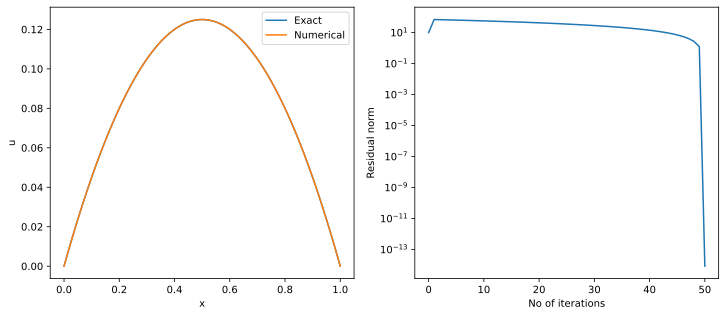

In [18]:
xmin, xmax = 0.0, 1.0
n = 100

h = (xmax - xmin)/n
x = np.linspace(0.0, 1.0, n+1) # Grid
f = np.ones(n+1)               # rhs
ue= 0.5*x*(1.0-x)              # exact solution

TOL   = 1.0e-6
itmax = 100

u   = np.zeros(n+1)
p   = np.zeros(n+1)
res = np.array(f)

# First and last grid point, solution is fixed to zero.
# Hence we make residual zero, in which case solution
# will not change at these points. These two will 
# remain zero throughout the following code.
res[0] = 0.0
res[n] = 0.0

f_norm = np.linalg.norm(f)
res_old, res_new, res_data = 0.0, 0.0, []
for it in range(itmax):
    res_new = np.linalg.norm(res); res_data.append(res_new)
    print('iter,res =', it, res_new)
    if res_new < TOL * f_norm:
        break
    if it == 0:
        beta = 0.0
    else:
        beta = res_new**2 / res_old**2
    p        = res + beta * p
    ap       = ax(h,p)
    alpha    = res_new**2 / p.dot(ap)
    u       += alpha * p
    res     -= alpha * ap
    res_old  = res_new

print("Number of iterations = %d" % it)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x,ue,label="Exact")
plt.plot(x,u,label="Numerical")
plt.xlabel("x"); plt.ylabel("u")
plt.legend()

plt.subplot(122)
plt.semilogy(res_data)
plt.xlabel("No of iterations")
plt.ylabel("Residual norm");